<a href="https://colab.research.google.com/github/gilarndw/Data_Science_proj/blob/main/tsla_analisys_ver1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




> Import Library

> Reading the data





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as plt_date
import statsmodels.formula.api as smf
from scipy import stats

tsla_raw = pd.read_csv('/content/drive/My Drive/datasets/TSLA.csv')
tsla_raw

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2808,2021-08-24,710.679993,715.219971,702.640015,708.489990,708.489990,13083100
2809,2021-08-25,707.030029,716.969971,704.000000,711.200012,711.200012,12645600
2810,2021-08-26,708.309998,715.400024,697.619995,701.159973,701.159973,13214300
2811,2021-08-27,705.000000,715.000000,702.099976,711.919983,711.919983,13762100


In [3]:
tsla_raw.isna().all() #check if there's an empty value or not
#if yes bool = True or else bool = False

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [4]:
tsla_raw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2.813000e+03
mean,98.307804,100.386953,96.069256,98.349877,98.349877,3.160441e+07
std,176.108180,179.847860,171.937613,176.160413,176.160413,2.857384e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,8.838000,9.228000,8.782000,9.090000,9.090000,1.232800e+07
50%,45.720001,46.307999,44.908001,45.664001,45.664001,2.513300e+07
75%,63.998001,65.334000,63.014000,64.269997,64.269997,4.050650e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [5]:
 tsla_raw = tsla_raw.drop(columns = ['Adj Close'])
 tsla_raw

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...,...
2808,2021-08-24,710.679993,715.219971,702.640015,708.489990,13083100
2809,2021-08-25,707.030029,716.969971,704.000000,711.200012,12645600
2810,2021-08-26,708.309998,715.400024,697.619995,701.159973,13214300
2811,2021-08-27,705.000000,715.000000,702.099976,711.919983,13762100


In [6]:
tsla_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2813 non-null   object 
 1   Open    2813 non-null   float64
 2   High    2813 non-null   float64
 3   Low     2813 non-null   float64
 4   Close   2813 non-null   float64
 5   Volume  2813 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 132.0+ KB


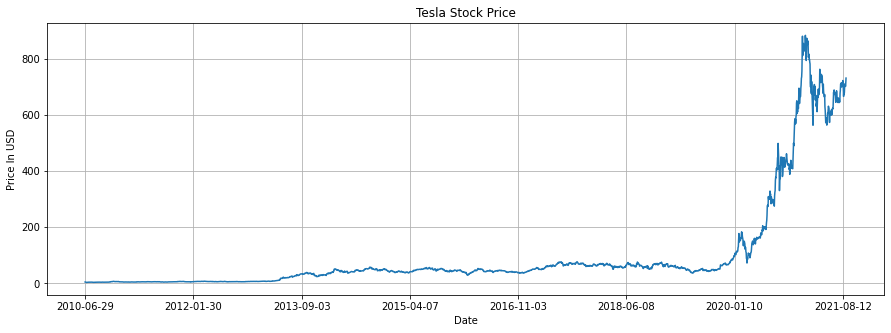

In [7]:
col_date = tsla_raw['Date']
col_close = tsla_raw['Close']

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(col_date, col_close)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Price In USD')
plt.title('Tesla Stock Price')
plt.grid()
plt.show()

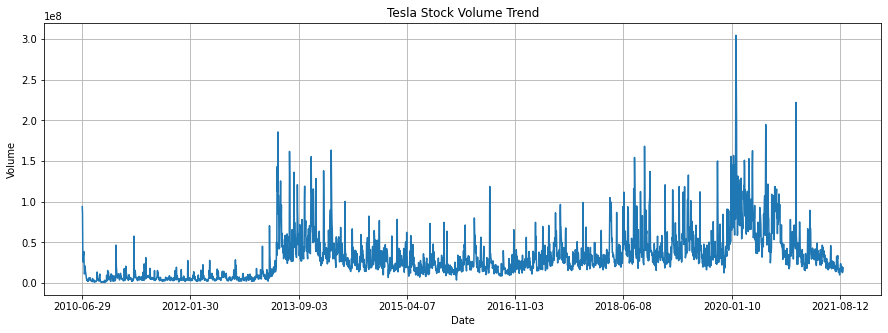

In [8]:
col_volume = tsla_raw['Volume']

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(col_date, col_volume)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
plt.title('Tesla Stock Volume Trend')
plt.grid()
plt.show()

Calculating the Market Cap

In [9]:
tsla_raw['Market_Cap'] = tsla_raw['Open'] * tsla_raw['Volume']
tsla_raw

,Date,Open,High,Low,Close,Volume,Market_Cap
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,3.565597e+08
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,4.432553e+08
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,2.054700e+08
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,1.182154e+08
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,1.373380e+08
...,...,...,...,...,...,...,...
2808,2021-08-24,710.679993,715.219971,702.640015,708.489990,13083100,9.297897e+09
2809,2021-08-25,707.030029,716.969971,704.000000,711.200012,12645600,8.940819e+09
2810,2021-08-26,708.309998,715.400024,697.619995,701.159973,13214300,9.359821e+09
2811,2021-08-27,705.000000,715.000000,702.099976,711.919983,13762100,9.702280e+09


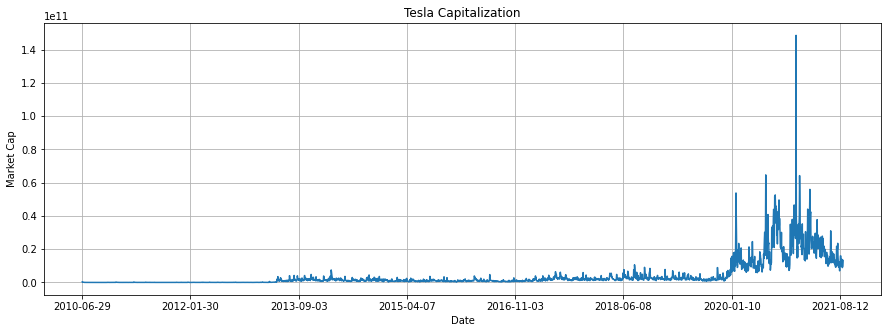

In [10]:
col_markcap = tsla_raw['Market_Cap']

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(col_date, col_markcap)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Market Cap')
plt.title('Tesla Capitalization')
plt.grid()
plt.show()

In [11]:
tsla_raw.iloc[col_markcap.argmax()]

Date          2020-12-18
Open               668.9
High                 695
Low               628.54
Close                695
Volume         222126200
Market_Cap    1.4858e+11
Name: 2638, dtype: object

Tesla gain maximum Market Capitalization in December 18, 2020

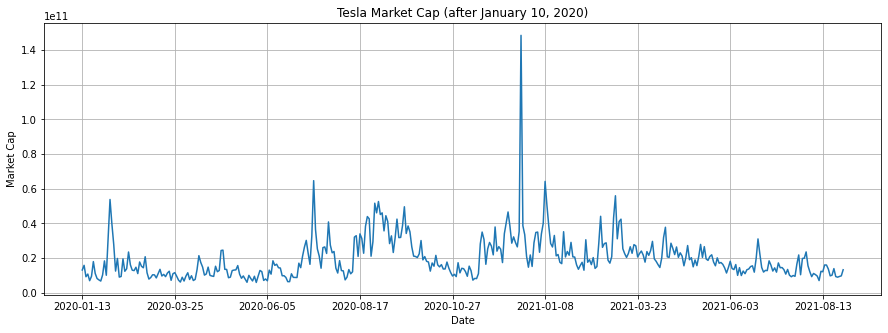

In [12]:
tsla_chart = tsla_raw[col_date > '2020-01-10']

col_newdate = tsla_chart['Date']
col_newmark = tsla_chart['Market_Cap']

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(col_newdate, col_newmark)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Market Cap')
plt.title('Tesla Market Cap (after January 10, 2020)')
plt.grid()
plt.show()

In [13]:
#Now we're going to see the relationship between Market Cap + Volume and Close
#We'll see if Market Cap + Volume can predict Close price or not

model = smf.ols('Close ~ Market_Cap + Volume', data = tsla_raw)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2934.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        01:33:47   Log-Likelihood:                -16952.
No. Observations:                2813   AIC:                         3.391e+04
Df Residuals:                    2810   BIC:                         3.393e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.2798      2.825     27.356      0.0

From the model above we can conclude that :

1. P-value of Market Cap, Volume and Intercept = 0
2. P-value is statistically significant for all of the variables, as it is less than 0.05

We can agree that Market Cap and Volume are related to Close price





In [14]:
def Predict_Close(Market_Cap,Volume):
 return(2.015e-08 * Market_Cap - 3.852e-06 * Volume + 77.2798)

print(Predict_Close(9.297897e+09,13083100)) #Market Cap and Volume on 2021-08-24
print(Predict_Close(1.373380e+08,34334500)) #Market Cap and Volume on 2010-07-06
print(Predict_Close(1.322403e+10,18502400)) #Market Cap and Volume on 2021-08-30

214.23632334999996
-52.2093333
272.4727597


However if we test to calculate the coef numbers with our data,

the results are inaccurate.



> In conclusion : We cannot predict Close price with Market Cap and Volume



In [15]:
#Now we going to find the Volatility of Tesla Stock
tsla_raw['Vol'] = tsla_raw['Close']/tsla_raw['Close'].shift(1) - 1
tsla_raw

,Date,Open,High,Low,Close,Volume,Market_Cap,Vol
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,3.565597e+08,NaN
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,4.432553e+08,-0.002512
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,2.054700e+08,-0.078473
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,1.182154e+08,-0.125683
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,1.373380e+08,-0.160937
...,...,...,...,...,...,...,...,...
2808,2021-08-24,710.679993,715.219971,702.640015,708.489990,13083100,9.297897e+09,0.003101
2809,2021-08-25,707.030029,716.969971,704.000000,711.200012,12645600,8.940819e+09,0.003825
2810,2021-08-26,708.309998,715.400024,697.619995,701.159973,13214300,9.359821e+09,-0.014117
2811,2021-08-27,705.000000,715.000000,702.099976,711.919983,13762100,9.702280e+09,0.015346


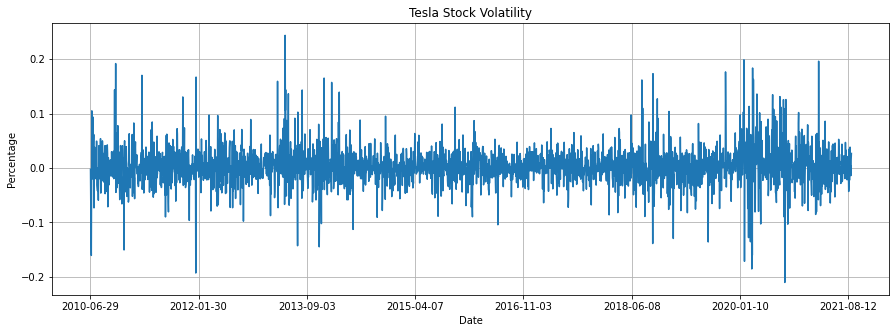

In [16]:
col_vol = tsla_raw['Vol']

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(col_date, col_vol)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
plt.title('Tesla Stock Volatility')
plt.grid()
plt.show()

In [17]:
tsla_raw.iloc[col_vol.argmax()] 

Date           2013-05-09
Open               14.024
High               15.154
Low                12.738
Close               13.88
Volume          143025000
Market_Cap    2.00578e+09
Vol              0.243951
Name: 720, dtype: object

In [18]:
tsla_raw.iloc[col_vol.argmin()]

Date           2020-09-08
Open                  356
High               368.74
Low                329.88
Close              330.21
Volume          115465700
Market_Cap    4.11058e+10
Vol             -0.210628
Name: 2566, dtype: object

In [19]:
col_vol.describe()

count    2812.000000
mean        0.002414
std         0.035448
min        -0.210628
25%        -0.014935
50%         0.001139
75%         0.019187
max         0.243951
Name: Vol, dtype: float64